In [100]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from PIL import Image
import seaborn as sn
import matplotlib.pyplot as plt
import os
from natsort import natsorted
from tqdm import tqdm
import cv2
import skvideo.io



from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import seaborn as sns

In [101]:
file_paths = {'11': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/11.csv',
 '12': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/12.csv',
 '13': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/13.csv',
 '14': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/14.csv',
 '15': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/15.csv',
 '19': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/19.csv',
 '21': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/21.csv',
 '22': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/22.csv',
 '23': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/23.csv',
 '24': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/24.csv',
 '29': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/29.csv',
 '30': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/30.csv',
 '35': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/35.csv',
 '36': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/36.csv',
 '38': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/38.csv',
 '47': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/47.csv',
 '52': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/52.csv',
 '54': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/54.csv',
 '60': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/60.csv',
 '82': '/Users/julianna/Desktop/kinematic_df/participant_dataframes/82.csv'}

# Initialize an empty dictionary to hold your DataFrames
participant_dataframes = {}

# Loop over the file_paths dictionary and read each CSV file into a DataFrame
for name, file_path in file_paths.items():
    participant_dataframes[name] = pd.read_csv(file_path)


In [102]:
participant_dataframes['21']

,frame_name,fid,class,bb0,bb1,bb2,bb3,ID,center_x_pixels,center_y_pixels,center_x_um,center_y_um,frame_number,delta_x,delta_y
0,21_frame_0_with_ftid,ckz3vwyqh000r3867ejpqrh3v,0,0.184375,0.166667,0.025000,0.033333,21,118.000000,80.0,245.833333,166.666667,0,0.000000,0.0
1,21_frame_1_with_ftid,ckz3vwyqh000r3867ejpqrh3v,0,0.184346,0.166667,0.025000,0.033333,21,117.981567,80.0,245.794931,166.666667,1,-0.038402,0.0
2,21_frame_2_with_ftid,ckz3vwyqh000r3867ejpqrh3v,0,0.184317,0.166667,0.025000,0.033333,21,117.963134,80.0,245.756528,166.666667,2,-0.038402,0.0
3,21_frame_3_with_ftid,ckz3vwyqh000r3867ejpqrh3v,0,0.184289,0.166667,0.025000,0.033333,21,117.944700,80.0,245.718126,166.666667,3,-0.038402,0.0
4,21_frame_4_with_ftid,ckz3vwyqh000r3867ejpqrh3v,0,0.184260,0.166667,0.025000,0.033333,21,117.926267,80.0,245.679724,166.666667,4,-0.038402,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32505,21_frame_748_with_ftid,cl522zdjv000f3r6gd65erki8,2,0.053906,0.406250,0.020313,0.033333,21,34.500000,195.0,71.875000,406.250000,748,0.000000,0.0
32506,21_frame_749_with_ftid,cl522zdjv000f3r6gd65erki8,2,0.053906,0.406250,0.020313,0.033333,21,34.500000,195.0,71.875000,406.250000,749,0.000000,0.0
32507,21_frame_750_with_ftid,cl522zdjv000f3r6gd65erki8,2,0.053906,0.406250,0.020313,0.033333,21,34.500000,195.0,71.875000,406.250000,750,0.000000,0.0
32508,21_frame_751_with_ftid,cl522zdjv000f3r6gd65erki8,2,0.053906,0.406250,0.020313,0.033333,21,34.500000,195.0,71.875000,406.250000,751,0.000000,0.0


In [103]:
def moving_average(series, window_size=3):
    return series.rolling(window=window_size, min_periods=1, center=True).mean()

def apply_moving_average(df, window_size=3):
    df['avg_center_x_um'] = df.groupby('fid')['center_x_um'].transform(lambda x: moving_average(x, window_size))
    df['avg_center_y_um'] = df.groupby('fid')['center_y_um'].transform(lambda x: moving_average(x, window_size))
    return df




def distance_between_segments(seg1_start, seg1_end, seg2_start, seg2_end):
    # Calculate midpoints of each segment
    midpoint1 = ((seg1_start[0] + seg1_end[0]) / 2, (seg1_start[1] + seg1_end[1]) / 2)
    midpoint2 = ((seg2_start[0] + seg2_end[0]) / 2, (seg2_start[1] + seg2_end[1]) / 2)
    
    # Calculate Euclidean distance between midpoints
    return np.sqrt((midpoint1[0] - midpoint2[0])**2 + (midpoint1[1] - midpoint2[1])**2)


def calculate_risers(df, wSize):
    df['riser'] = np.nan  # Initialize the column

    for fid, group in df.groupby('fid'):
        for j in range(len(group) - wSize - 1):
            min_dist = 999999  # Large initial value
            for k in range(j, min(j + wSize - 1, len(group) - 1)):
                # Define segments
                seg_actual_start = (group.iloc[k]['center_x_um'], group.iloc[k]['center_y_um'])
                seg_actual_end = (group.iloc[k + 1]['center_x_um'], group.iloc[k + 1]['center_y_um'])
                seg_avg_start = (group.iloc[j]['avg_center_x_um'], group.iloc[j]['avg_center_y_um'])
                seg_avg_end = (group.iloc[j + 1]['avg_center_x_um'], group.iloc[j + 1]['avg_center_y_um'])

                # Calculate distance
                dist = distance_between_segments(seg_actual_start, seg_actual_end, seg_avg_start, seg_avg_end)
                min_dist = min(min_dist, dist)

            df.loc[group.index[j], 'riser'] = min_dist

    return df

def calculate_alh(df):
    alh_results = []
    for fid, group in df.groupby('fid'):
        alh_max = group['riser'].max()  # Maximum riser value in the group
        alh_mean = group['riser'].mean()  # Mean riser value in the group

        # Assuming Params.micronPerPixel is a known scaling factor
        micron_per_pixel = 1 / 0.48   # Replace with actual value
        alh_results.append({'fid': fid, 'ALH Mean': 2 * alh_mean * micron_per_pixel, 'ALH Max': 2 * alh_max * micron_per_pixel})

    return pd.DataFrame(alh_results)



In [99]:
df = participant_dataframes['21']
# window_size = 3

# apply_moving_average(df, window_size)

# calculate_risers(df, window_size)

# calculate_alh(df)


In [104]:
window_size = 3

for key, df in participant_dataframes.items():
    # Apply moving average
    df = apply_moving_average(df, window_size)

    # Calculate risers
    calculate_risers(df, window_size)

    # Calculate ALH
    alh_df = calculate_alh(df)

    # Merge the ALH results with the original DataFrame based on the 'fid' column
    df = pd.merge(df, alh_df, on='fid', how='left')

    # Update the DataFrame in the dictionary with the ALH values
    participant_dataframes[key] = df

# Now, each DataFrame in the participant_dataframes dictionary contains ALH values


In [72]:
file_paths = {}
for name, df in participant_dataframes.items():
    file_path = f'/Users/julianna/Desktop/kinematic_df/simple_ALH_calc{name}.csv'
    df.to_csv(file_path, index=False)
    file_paths[name] = file_path

file_paths

{'11': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc11.csv',
 '12': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc12.csv',
 '13': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc13.csv',
 '14': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc14.csv',
 '15': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc15.csv',
 '19': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc19.csv',
 '21': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc21.csv',
 '22': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc22.csv',
 '23': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc23.csv',
 '24': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc24.csv',
 '29': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc29.csv',
 '30': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc30.csv',
 '35': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc35.csv',
 '36': '/Users/julianna/Desktop/kinematic_df/simple_ALH_calc36.csv',
 '38': '/Users/julianna/Desktop/ki

In [34]:
# Assuming participant_dataframes['21'] is your DataFrame
df = participant_dataframes['21']

# Select a specific fid to plot, e.g., fid = 1
selected_fid = 'cl3l9sy3p000o3r6crvrc7d5m'
plot_data = df[df['fid'] == selected_fid]


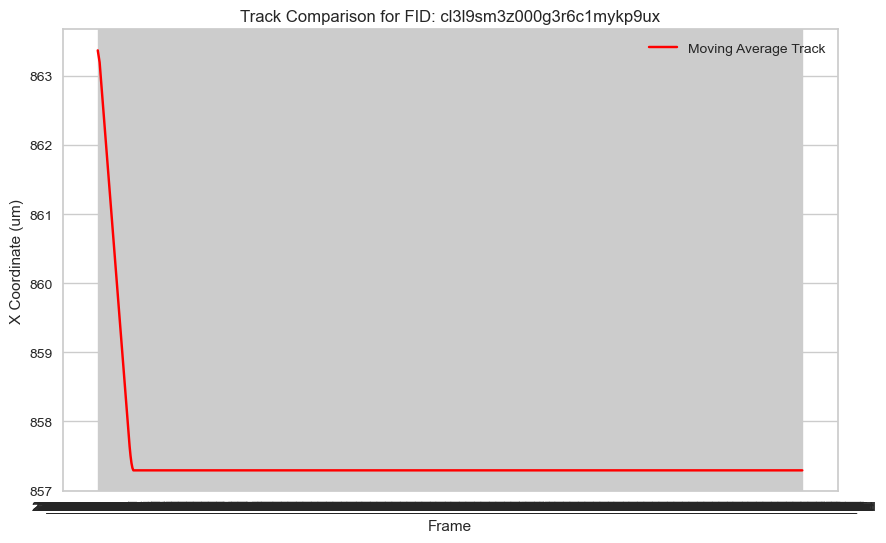

In [62]:
selected_fid = 'cl3l9sm3z000g3r6c1mykp9ux'
plot_data = df[df['fid'] == selected_fid]
plt.figure(figsize=(10, 6))

# Plot original track
# plt.plot(plot_data['frame_name'], plot_data['center_x_um'], label='Original Track', color='blue')

# Plot moving average track
plt.plot(plot_data['frame_name'], plot_data['avg_center_x_um'], label='Moving Average Track', color='red')

plt.xlabel('Frame')
plt.ylabel('X Coordinate (um)')
plt.title(f'Track Comparison for FID: {selected_fid}')
plt.legend()
plt.show()


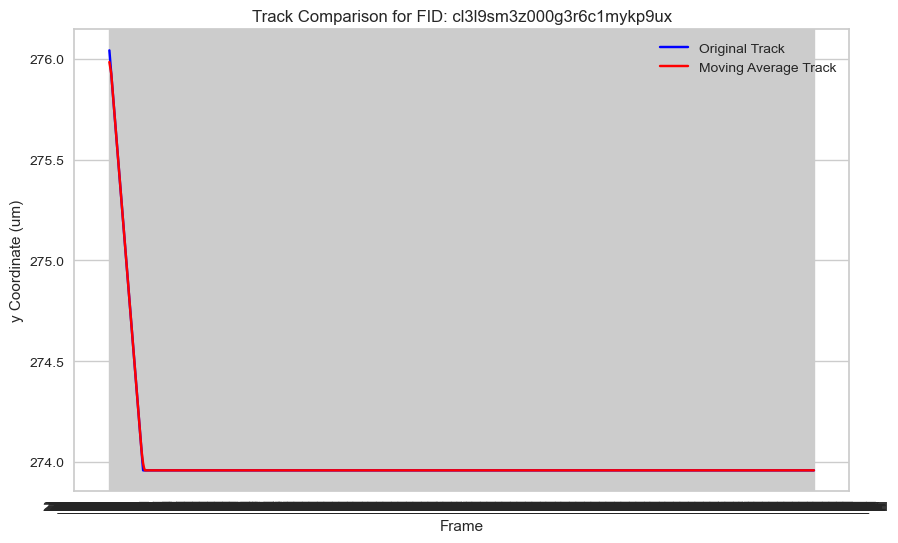

In [63]:
plt.figure(figsize=(10, 6))

# Plot original track
plt.plot(plot_data['frame_name'], plot_data['center_y_um'], label='Original Track', color='blue')

# Plot moving average track
plt.plot(plot_data['frame_name'], plot_data['avg_center_y_um'], label='Moving Average Track', color='red')

plt.xlabel('Frame')
plt.ylabel('y Coordinate (um)')
plt.title(f'Track Comparison for FID: {selected_fid}')
plt.legend()
plt.show()

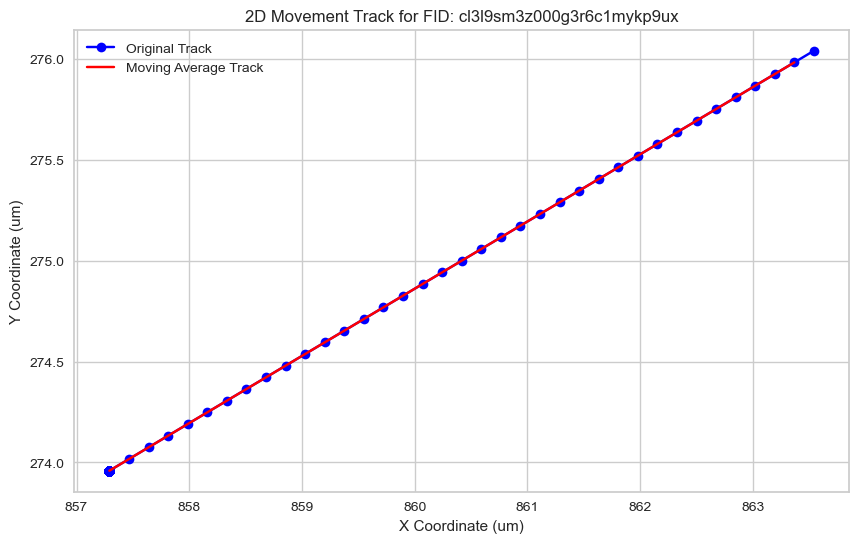

In [64]:
plt.figure(figsize=(10, 6))

# Plot original track
plt.plot(plot_data['center_x_um'], plot_data['center_y_um'], label='Original Track', color='blue', marker='o')

# Plot moving average track
plt.plot(plot_data['avg_center_x_um'], plot_data['avg_center_y_um'], label='Moving Average Track', color='red', marker='x')

plt.xlabel('X Coordinate (um)')
plt.ylabel('Y Coordinate (um)')
plt.title(f'2D Movement Track for FID: {selected_fid}')
plt.legend()
plt.show()
